In [1]:
### importing necessary libraries to reading dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
### Reading Dataset

data = pd.read_csv('/content/Heart Disease Dataset.csv')

In [3]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
data.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
### important Features cp, thal, ca, oldpeak, thalach, exang, age, sex
### cp (Chest pain) type (4 types):
###     0: typical angina
###     1: atypical angina
###     2: non-anginal pain
###     3: asymptomatic

### thal	int64	Thalassemia type:
###     0 = normal
###     1 = fixed defect
###     2 = reversible defect

### ca Number of major vessels (0–3) colored by fluoroscopy

### oldpeak ST depression induced by exercise relative to rest

### thalach Maximum heart rate achieved

### exang Exercise-induced angina: 1 = yes, 0 = no

### age Age of the patient (years)

### sex Sex of the patient: 0 = female, 1 = male


df = pd.DataFrame(data, columns=['cp', 'thal', 'ca', 'oldpeak', 'thalach', 'exang', 'age', 'sex','target'])
df.head()



,cp,thal,ca,oldpeak,thalach,exang,age,sex,target
0,3,1,0,2.3,150,0,63,1,1
1,2,2,0,3.5,187,0,37,1,1
2,1,2,0,1.4,172,0,41,0,1
3,1,2,0,0.8,178,0,56,1,1
4,0,2,0,0.6,163,1,57,0,1


# Data Visualization

<Axes: >

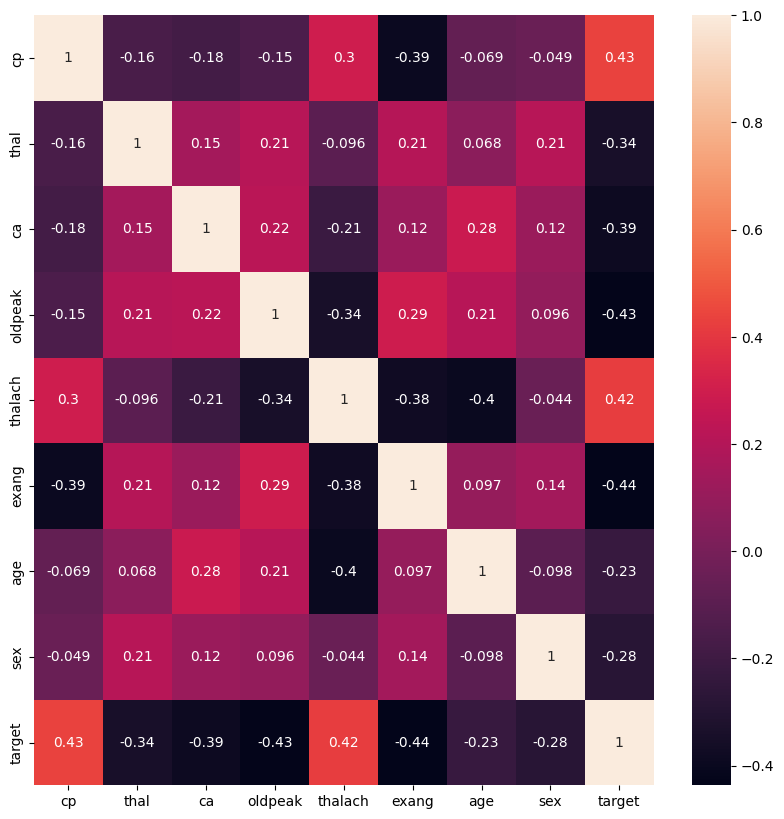

In [7]:
### Heat map
corr = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True)

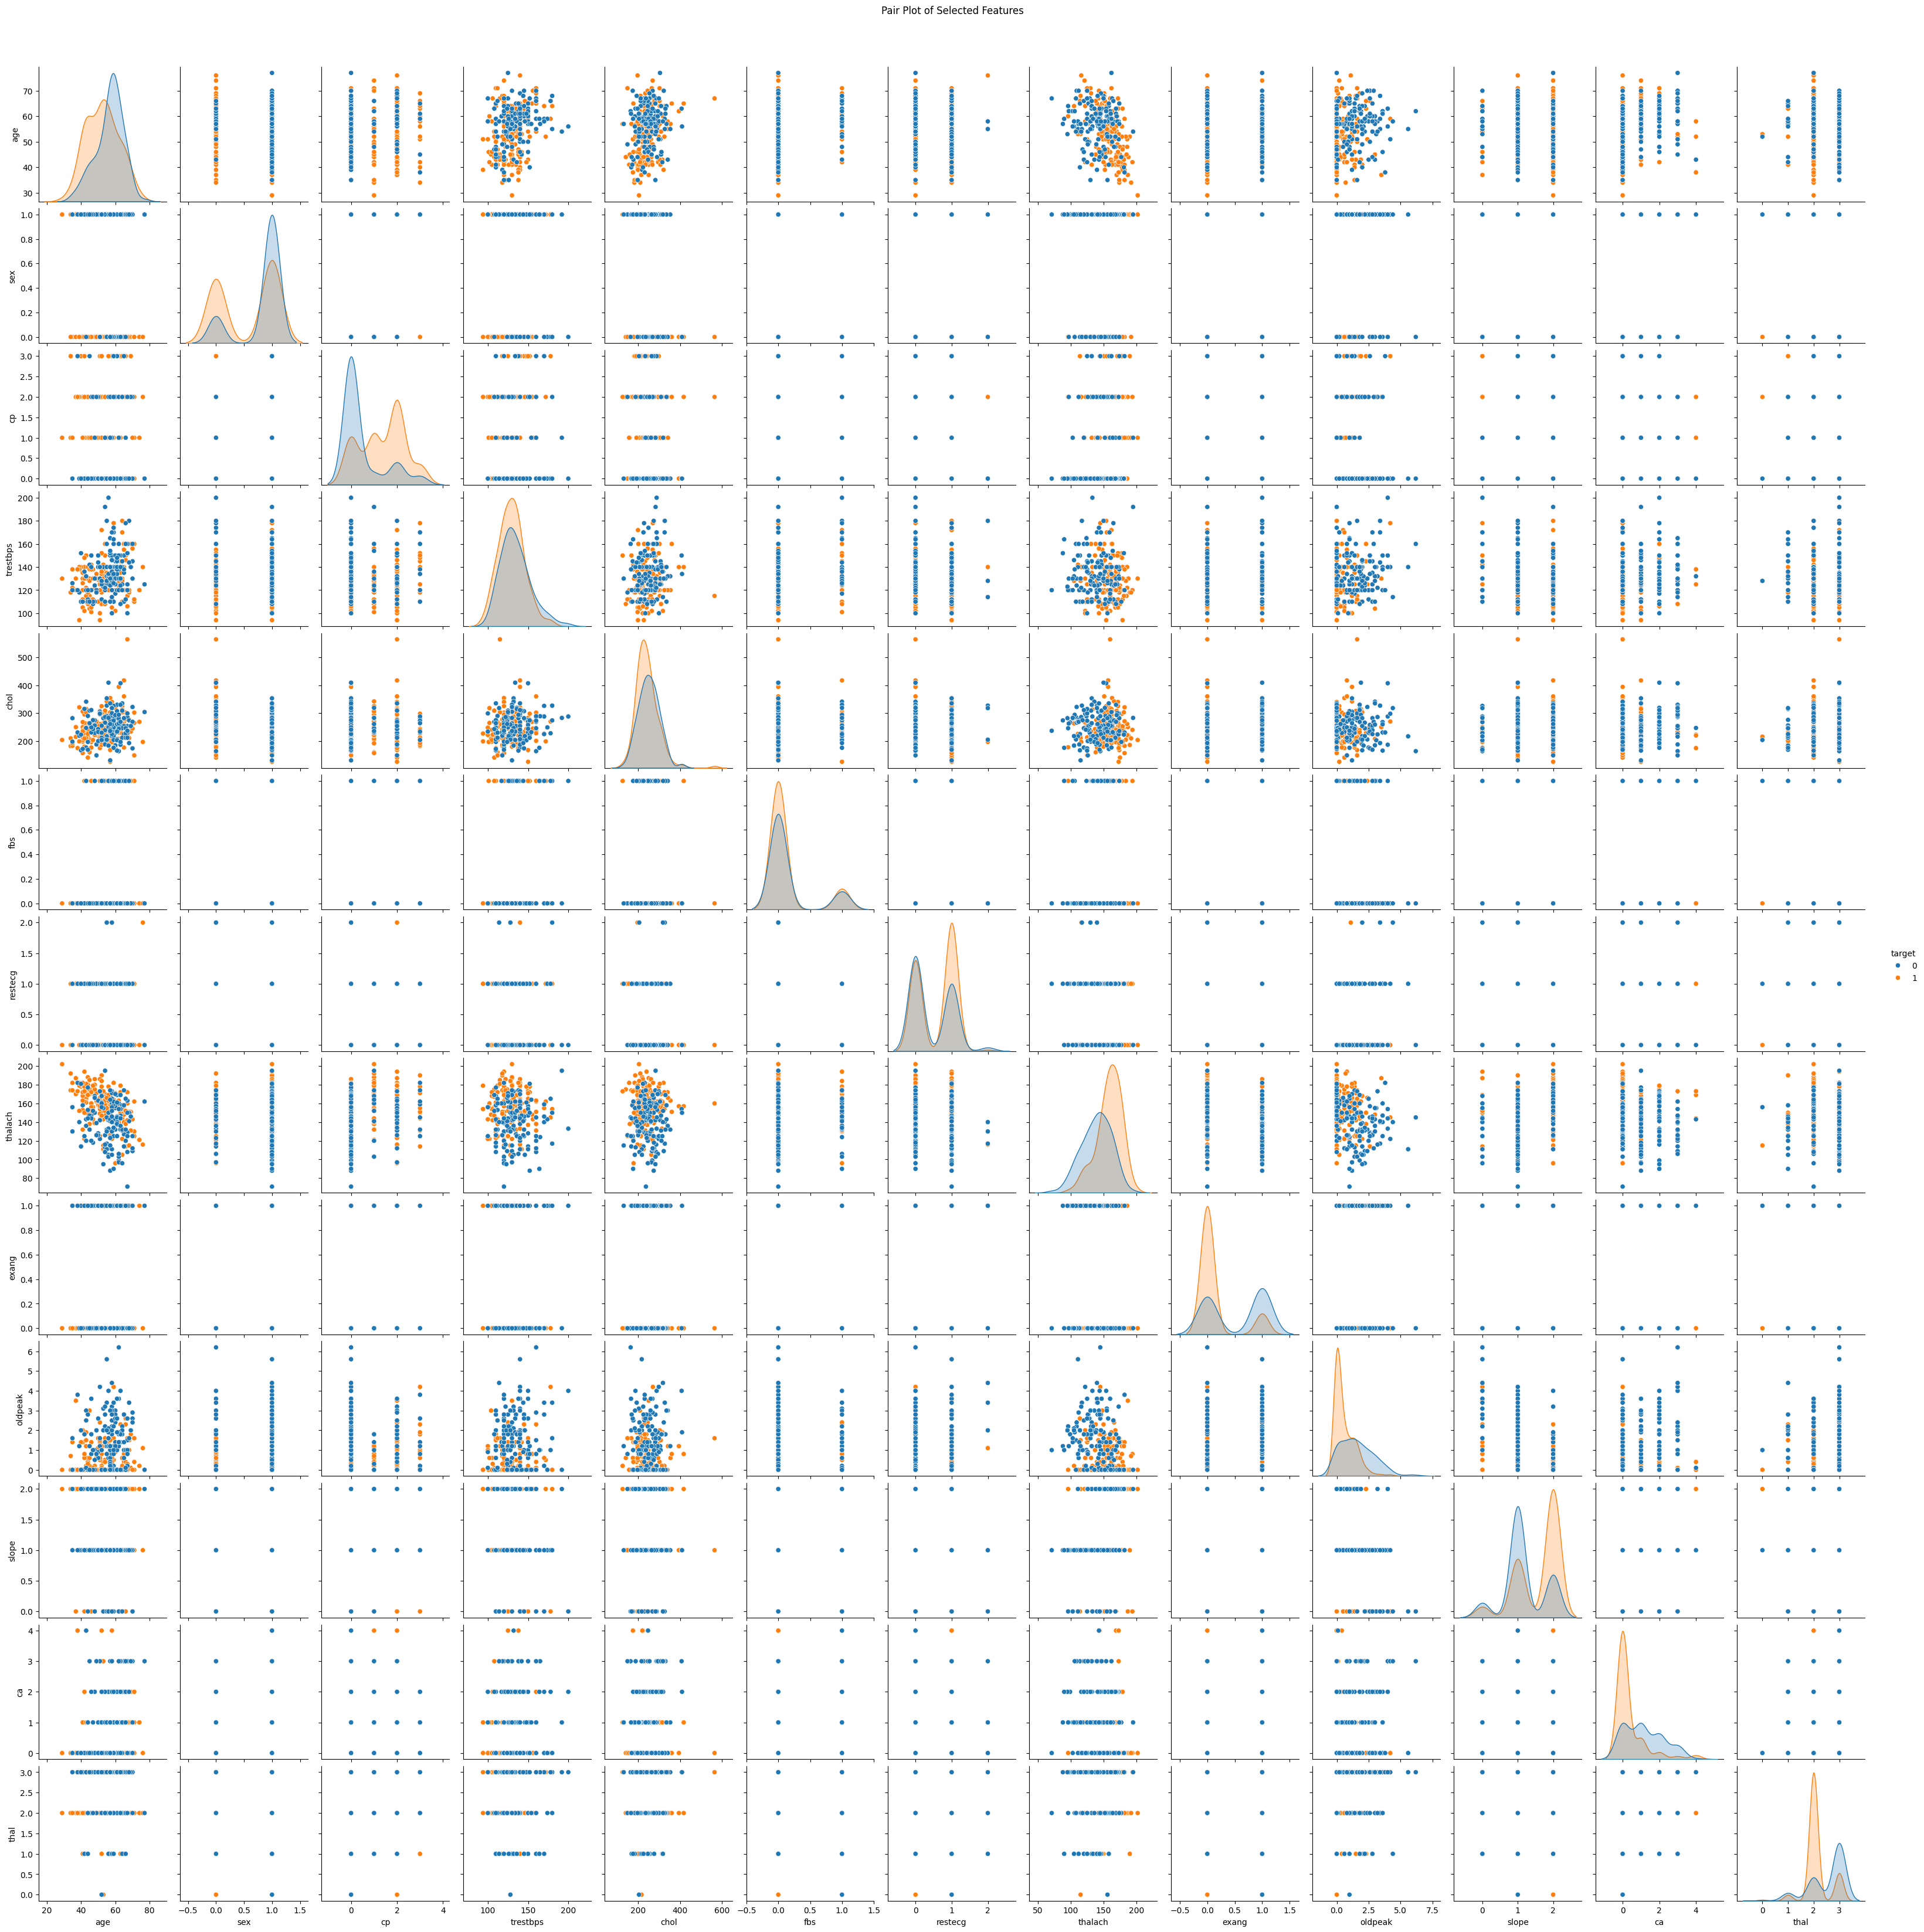

In [8]:
sns.pairplot(data, hue="target")
plt.suptitle("Pair Plot of Selected Features", y=1.02)
plt.show()

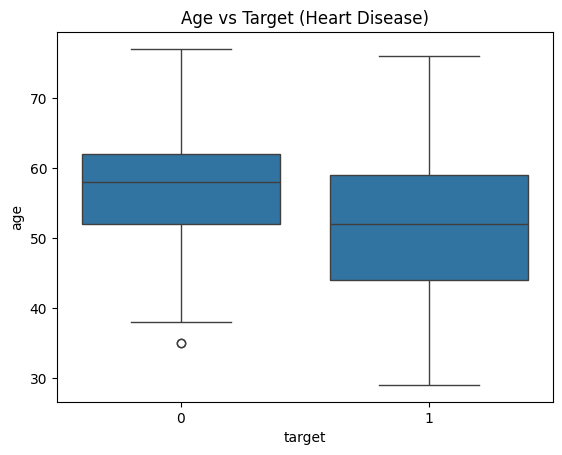

In [9]:
sns.boxplot(x="target", y="age", data=df)
plt.title("Age vs Target (Heart Disease)")
plt.show()

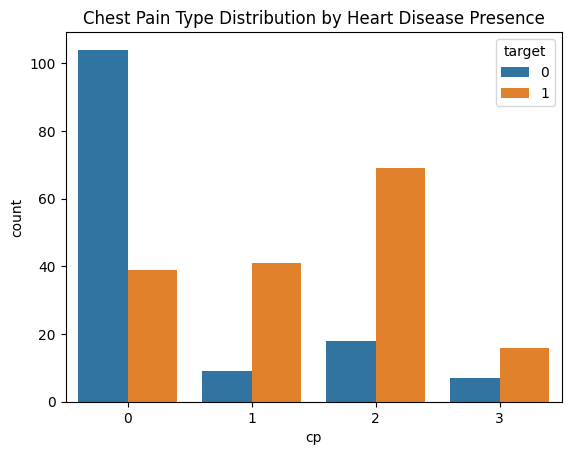

In [10]:
sns.countplot(x="cp", hue="target", data=df)
plt.title("Chest Pain Type Distribution by Heart Disease Presence")
plt.show()

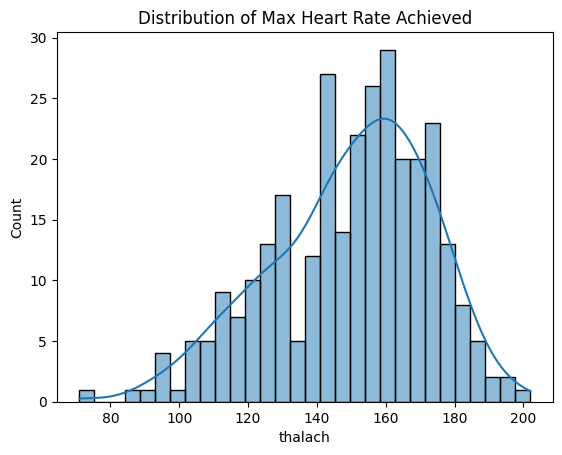

In [11]:
sns.histplot(df["thalach"], kde=True, bins=30)
plt.title("Distribution of Max Heart Rate Achieved")
plt.show()

### Creating Artifical Neural Network

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [13]:
y = df['target']
X = df.drop('target',axis=1)


In [14]:
X.head()

,cp,thal,ca,oldpeak,thalach,exang,age,sex
0,3,1,0,2.3,150,0,63,1
1,2,2,0,3.5,187,0,37,1
2,1,2,0,1.4,172,0,41,0
3,1,2,0,0.8,178,0,56,1
4,0,2,0,0.6,163,1,57,0


In [15]:
y.head()

,target
0,1
1,1
2,1
3,1
4,1


In [16]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)


In [17]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [18]:
!pip install tensorflow
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout,Dense

In [19]:
model = Sequential()

# 1st hidden layer + inputs
model.add(Dense(units=8,activation='relu',input_dim=X_train.shape[1]))
model.add(Dropout(0.2))

# 2nd hidden lyaer
model.add(Dense(units=16,activation='relu'))
model.add(Dropout(0.3))

# output layer
model.add(Dense(units=1,activation='sigmoid'))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [24]:
history = model.fit(X_train,y_train,batch_size=10,epochs=100,validation_data=(X_train,y_train))

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8604 - loss: 0.3469 - val_accuracy: 0.8595 - val_loss: 0.3294
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8366 - loss: 0.4549 - val_accuracy: 0.8636 - val_loss: 0.3287
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8141 - loss: 0.3924 - val_accuracy: 0.8636 - val_loss: 0.3276
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8226 - loss: 0.3763 - val_accuracy: 0.8636 - val_loss: 0.3264
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7901 - loss: 0.4167 - val_accuracy: 0.8636 - val_loss: 0.3255
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8633 - loss: 0.3394 - val_accuracy: 0.8678 - val_loss: 0.3246
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8219 - loss: 0.3892 - val_accuracy: 0.8678 - val_loss: 0.3241
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8534 - loss: 0.3343 - val_accuracy: 0.8719

In [25]:
loss,accuracy = model.evaluate(X_test,y_test)
print("Test Loss : ",loss)
print("Accuracy : ",accuracy)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.8714 - loss: 0.4645
Test Loss :  0.4405001699924469
Accuracy :  0.8852459192276001


In [26]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

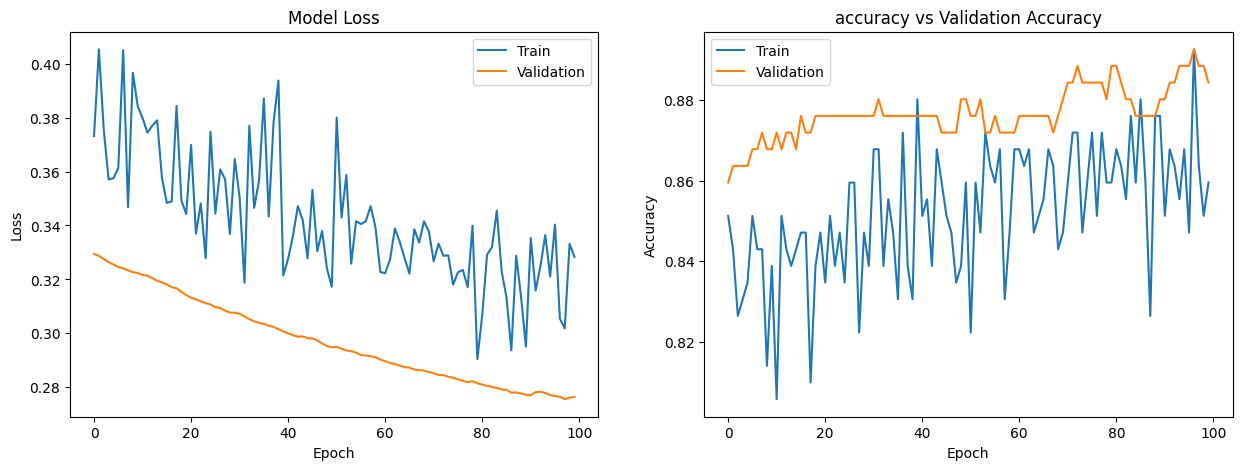

In [29]:
fig,ax=plt.subplots(1,2,figsize=(15,5))

ax[0].plot(history.history['loss'])
ax[0].plot(history.history['val_loss'])
ax[0].set_title('Model Loss')
ax[0].set_ylabel('Loss')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train','Validation'],loc='upper right')

ax[1].plot(history.history['accuracy'])
ax[1].plot(history.history['val_accuracy'])
ax[1].set_title('accuracy vs Validation Accuracy')
ax[1].set_ylabel('Accuracy')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train','Validation'],loc='upper left')

In [36]:
value = [X_test[3]]
value = sc.transform(value)
prediction = model.predict(value)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [37]:
print(prediction)
if prediction>0.5:
  print(" Yes")
else:
  print("No")

[[0.25442955]]
No


In [43]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
y_values = model.predict(sc.transform(X_test))
y_pred = []
for i in y_values:
  if i>0.5:
    y_pred.append(1)
  else:
    y_pred.append(0)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [45]:
print("Accuracy Score : ",accuracy_score(y_test,y_pred))
print("Confuction Matrix : ",confusion_matrix(y_test,y_pred))
print("Classfication Report : ",classification_report(y_test,y_pred))

Accuracy Score :  0.8360655737704918
Confuction Matrix :  [[22  7]
 [ 3 29]]
Classfication Report :                precision    recall  f1-score   support

           0       0.88      0.76      0.81        29
           1       0.81      0.91      0.85        32

    accuracy                           0.84        61
   macro avg       0.84      0.83      0.83        61
weighted avg       0.84      0.84      0.83        61

